# Estimate change in lake volume
Worldview imagery from the 2024-25 season over Flask Glacier was used to create digital elevation models (DEMs). They we coregistered in `load_WV_dems.ipynb`.

Differencing the DEMs show that the lake instrumented byt hte FRAM team in december 2024 drained. 

In this notebook we compute the change in the volume in the lake using the DEMs and a shapfile created manually in QGIS. 


In [5]:
import os
import numpy as np
import pdemtools as pdt
import rioxarray
#import geojson
import matplotlib.pyplot as plt
import geopandas


## Load a raster computed as the difference between two DEMs (see `coreg_WV_dems.ipynb`)

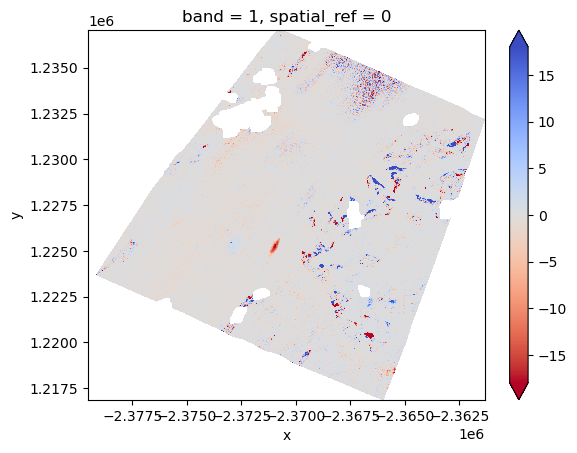

In [3]:
dz = rioxarray.open_rasterio('../../../remote sensing/worldview/coregistering/dz_coreg_eroded_bedrock_iter_20.tif').squeeze()
vrange=18
dz.plot.imshow(cmap='coolwarm_r', vmin=-vrange, vmax=vrange)

## Load a shapfile that oulines the lake, created in qgis

In [ ]:
lake = geopandas.read_file("../../../remote sensing/worldview/lake_volume/lake_outline_1.shp")
lake


,id,geometry
0,0,"POLYGON ((-62.6518 -65.78668, -62.64977 -65.78..."


## Reproject the shapefile to the same coordinate system as the DEM

In [8]:
lake_UPS = lake.to_crs(dz.rio.crs)
lake_UPS

,id,geometry
0,0,"POLYGON ((-2370795.624 1226185.902, -2370737.1..."


In [22]:
lake_UPS.explore(zoom_start=10)

## Crop the `dz` raster to the shapefile

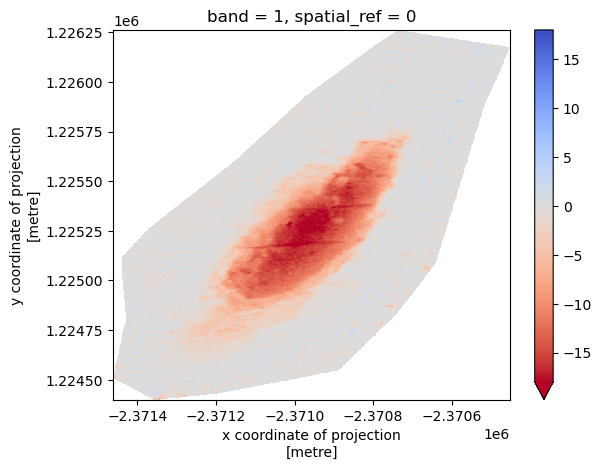

In [23]:
dz_cropped = dz.rio.clip(lake_UPS.geometry)
dz_cropped.plot.imshow(cmap='coolwarm_r', vmin=-vrange, vmax=vrange)

## Integrate to get the volume change

In [26]:
masked = dz_cropped.where(~np.isnan(dz_cropped))

res_x, res_y = dz_cropped.rio.resolution()
pixel_area = abs(res_x * res_y)

dV = (masked.sum(skipna=True)) * pixel_area
dV.values

array(-2562127.8, dtype=float32)